In [1]:
#import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import rioxarray

In [2]:
#read the csv file
df = pd.read_csv('/SNOWDATA/Nah/more-sites-with-lidar/Cameron/lidar/cam_var_30m.csv')

#drop NAN
df = df.dropna()
df

,SD_1,ASP_1,ELEV_1,VH_1
2,0.628906,206.308929,3293.338867,0.121094
4,1.130859,153.966263,3403.982422,0.057617
5,1.469971,266.102356,3377.460449,0.179443
6,1.073242,100.111496,3045.460938,11.279053
10,1.528564,147.367630,3136.703369,0.176514
...,...,...,...,...
11990,0.336182,207.556152,3508.330811,0.209229
11991,-0.075439,310.928131,3490.157715,0.102295
11993,1.459961,329.778870,3318.228516,3.751465
11995,1.496338,70.927956,3444.482666,0.417236


In [3]:
# Remove outliers
df = df[(df['SD_1'] > 0) & (df['SD_1'] < 5) ]

# Define aspects (N,E,S,W)
aspects = [
    ((df['ASP_1'] >= 315) | (df['ASP_1'] < 45)),
    ((df['ASP_1'] >= 45) & (df['ASP_1'] < 135)),
    ((df['ASP_1'] >= 135) & (df['ASP_1'] < 225)),
    ((df['ASP_1'] >= 225) & (df['ASP_1'] < 315))
]

nesw = [0, 1, 2, 3]


# Use np select to apply conditions and values
df['ASP_1'] = np.select(aspects, nesw)

#Define elevation classes
elevations = [(df['ELEV_1'] < 1800),
              ((df['ELEV_1'] >= 1800) & (df['ELEV_1'] < 2100)),
                (df['ELEV_1'] >= 2100)]

elevation_class = ['Low [<1800]', 'Mid [1800-2100]', 'High >2100']

# Use np select to apply conditions and values
df['elevation_class'] = np.select(elevations, elevation_class)

df

/tmp/ipykernel_48678/2403105832.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ASP_1'] = np.select(aspects, nesw)
/tmp/ipykernel_48678/2403105832.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['elevation_class'] = np.select(elevations, elevation_class)


,SD_1,ASP_1,ELEV_1,VH_1,elevation_class
2,0.628906,2,3293.338867,0.121094,High >2100
4,1.130859,2,3403.982422,0.057617,High >2100
5,1.469971,3,3377.460449,0.179443,High >2100
6,1.073242,1,3045.460938,11.279053,High >2100
10,1.528564,2,3136.703369,0.176514,High >2100
...,...,...,...,...,...
11987,1.389160,1,3283.712646,16.177246,High >2100
11990,0.336182,2,3508.330811,0.209229,High >2100
11993,1.459961,0,3318.228516,3.751465,High >2100
11995,1.496338,1,3444.482666,0.417236,High >2100


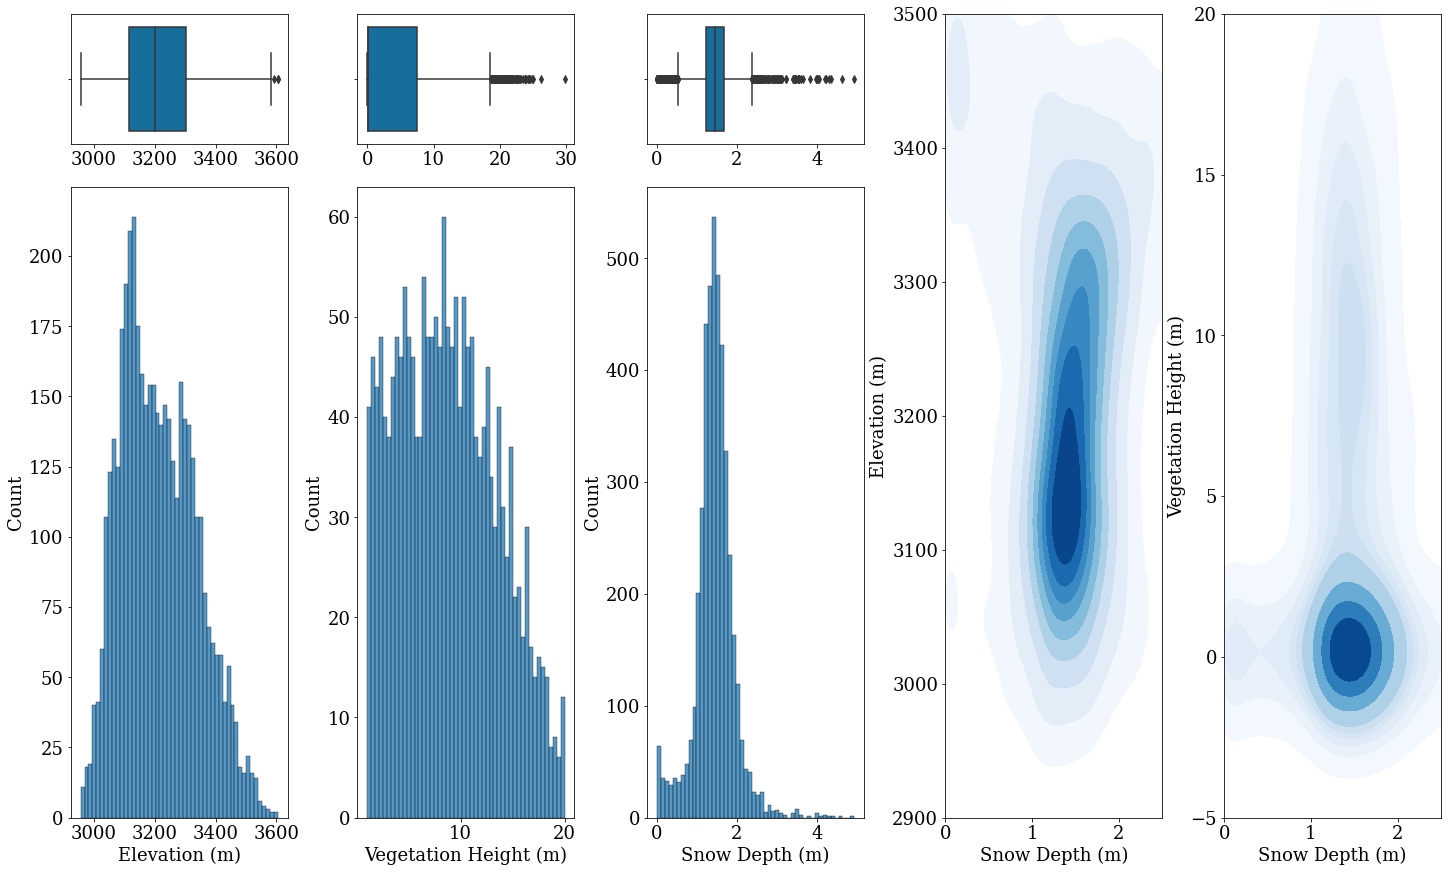

In [12]:
# Set font size and font family
plt.rcParams.update({'font.size': 18})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

#create figure and gridspec object
fig = plt.figure(figsize=(20,12), constrained_layout=True)
gspec = fig.add_gridspec(ncols=5, nrows=5)

ax0 = fig.add_subplot(gspec[0, 0])
ax1 = fig.add_subplot(gspec[0, 1])
ax2 = fig.add_subplot(gspec[0, 2])
ax3 = fig.add_subplot(gspec[1:5, 0])
ax4 = fig.add_subplot(gspec[1:5, 1])
ax5 = fig.add_subplot(gspec[1:5, 2])
ax6 = fig.add_subplot(gspec[0:5, 3])
ax7 = fig.add_subplot(gspec[0:5, 4])

# plot the boxplot of elevation, vegetation and snow thickness
sns.boxplot(x= df['ELEV_1'], ax=ax0, palette= 'colorblind')
ax0.set_xlabel('')
sns.boxplot(x= df['VH_1'], ax=ax1, palette= 'colorblind')
ax1.set_xlabel('')
sns.boxplot(x= df['SD_1'], ax=ax2, palette= 'colorblind')
ax2.set_xlabel('')

# plot the histogram and boxplot of elevation, vegetation and snow thickness
sns.histplot(data = df, x ='ELEV_1', ax=ax3, bins=50)
ax3.set_xlabel('Elevation (m)')
sns.histplot(data = df, x ='VH_1', ax=ax4, bins=50, binrange=(1,20))
ax4.set_xlabel('Vegetation Height (m)')
sns.histplot(data = df, x ='SD_1', ax=ax5, bins=50)
ax5.set_xlabel('Snow Depth (m)')

#make the scatter plot of elevation vs snow thickness and vegetation vs snow thickness
sns.kdeplot(data = df, x = 'SD_1', y = 'ELEV_1', shade=True, ax=ax6, cmap='Blues')
ax6.set_xlabel('Snow Depth (m)')
ax6.set_ylabel('Elevation (m)')
#set xlimt and y limt
ax6.set_xlim(0, 2.5)
ax6.set_ylim(2900, 3500)

sns.kdeplot(data = df, x = 'SD_1', y = 'VH_1', shade=True, ax=ax7, cmap='Blues')
ax7.set_xlabel('Snow Depth (m)')
ax7.set_ylabel('Vegetation Height (m)')
#set xlimt and y limt
ax7.set_xlim(0, 2.5)
ax7.set_ylim(-5, 20)


# #remove tick of the firstand second  axes
# ax0.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
# ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)




# #remove all spines on first axes
# ax0.spines['top'].set_visible(False)
# ax0.spines['right'].set_visible(False)
# ax0.spines['bottom'].set_visible(False)
# ax0.spines['left'].set_visible(False)

# #remove all spines on second axes
# ax1.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)
# ax1.spines['bottom'].set_visible(False)
# ax1.spines['left'].set_visible(False)

plt.show()